## Set-up and importing the class

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env PWD

'/home/rei/code/rmelbardis/BondingCurveNexus'

In [3]:
import os
%cd {os.getcwd()}/..

/home/rei/code/rmelbardis/BondingCurveNexus


In [4]:
from BondingCurveNexus.EducationGraphs.RAMM_HighLowCap_Protocol_det import RAMMHighLowCapProtocolDet 

## Sale Graphs

In [5]:
sale_sim = RAMMHighLowCapProtocolDet()

In [6]:
sale_sim.show_metrics()

 Capital pool: 145682 ETH
 Below NXM price: 0.01568902 ETH
 Above NXM price: 0.02176806423862074 ETH
 NXM Supply: 6759389.27720304
 Book Value: 0.021552538850119547 ETH
 RAMM ETH Liquidity: 5000
 Below NXM Reserve: 318694.2205440492
 Above NXM Reserve: 229694.28724530482


In [7]:
nxm_sale_size_1 = 10_000
sale_sim.protocol_nxm_sale(nxm_sale_size_1)
sale_sim.write_metrics()

In [8]:
sale_sim.show_metrics()

 Capital pool: 145529.88293533958 ETH
 Below NXM price: 0.014748914438822385 ETH
 Above NXM price: 0.02176806423862074 ETH
 NXM Supply: 6749389.27720304
 Book Value: 0.021561933525880057 ETH
 RAMM ETH Liquidity: 4847.882935339597
 Below NXM Reserve: 328694.2205440492
 Above NXM Reserve: 222706.20309630097


In [9]:
no_sale_steps_1 = 5
for i in range(no_sale_steps_1):
    sale_sim.sell_ratchet()
    sale_sim.write_metrics()

In [10]:
nxm_sale_size_2 = 5_000
sale_sim.protocol_nxm_sale(nxm_sale_size_2)
sale_sim.write_metrics()

In [11]:
no_sale_steps_2 = 15
for i in range(no_sale_steps_2):
    sale_sim.sell_ratchet()
    sale_sim.write_metrics()

In [12]:
# Import matplotlib and set colors
import matplotlib.pyplot as plt

nexus_green = '#0ab682'
nexus_blue = '#002332'

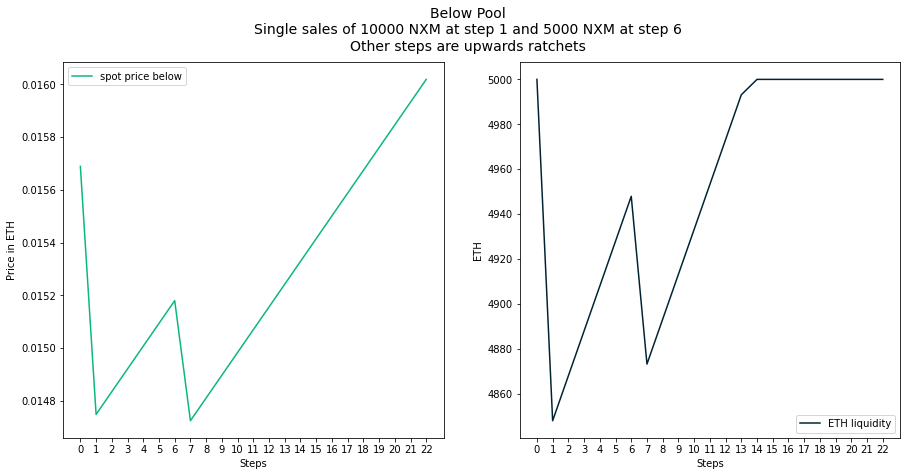

In [41]:
# Below Graphs

fig, axs = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle(f'''Below Pool
Single sales of {nxm_sale_size_1} NXM at step 1 and {nxm_sale_size_2} NXM at step 6
Other steps are upwards ratchets
            ''',
             fontsize=14)
fig.subplots_adjust(top=0.87)

# Subplot
axs[0].plot(range(sale_sim.steps+1), sale_sim.spot_price_b_prediction, label='spot price below', color=nexus_green)
# plt.plot(range(sale_sim.steps+1), sale_sim.book_value_prediction, label='book value')
# plt.ylim(bottom=0.0125)
axs[0].legend()
axs[0].set_xlabel("Steps")
axs[0].set_xticks(ticks=range(sale_sim.steps+1))
axs[0].set_ylabel("Price in ETH");

# Subplot
axs[1].plot(range(sale_sim.steps+1), sale_sim.liq_prediction, label='ETH liquidity', color=nexus_blue)
axs[1].legend()
axs[1].set_xlabel("Steps")
axs[1].set_xticks(ticks=range(sale_sim.steps+1))
axs[1].set_ylabel("ETH");

## Buy graphs

In [25]:
buy_sim = RAMMHighLowCapProtocolDet()

In [26]:
buy_sim.show_metrics()

 Capital pool: 145682 ETH
 Below NXM price: 0.01568902 ETH
 Above NXM price: 0.02176806423862074 ETH
 NXM Supply: 6759389.27720304
 Book Value: 0.021552538850119547 ETH
 RAMM ETH Liquidity: 5000
 Below NXM Reserve: 318694.2205440492
 Above NXM Reserve: 229694.28724530482


In [27]:
nxm_buy_size_1 = 5_000
buy_sim.protocol_nxm_buy(nxm_buy_size_1)
buy_sim.write_metrics()

In [28]:
buy_sim.show_metrics()

 Capital pool: 145793.26228577725 ETH
 Below NXM price: 0.01568902 ETH
 Above NXM price: 0.022747629004902715 ETH
 NXM Supply: 6764389.27720304
 Book Value: 0.02155305620525439 ETH
 RAMM ETH Liquidity: 5111.2622857772385
 Below NXM Reserve: 325785.9500323945
 Above NXM Reserve: 224694.28724530482


In [29]:
no_buy_steps_1 = 5
for i in range(no_buy_steps_1):
    buy_sim.buy_ratchet()
    buy_sim.write_metrics()

In [30]:
nxm_buy_size_2 = 10_000
buy_sim.protocol_nxm_buy(nxm_buy_size_2)
buy_sim.write_metrics()

In [31]:
no_buy_steps_2 = 10
for i in range(no_buy_steps_2):
    buy_sim.buy_ratchet()
    buy_sim.write_metrics()

In [32]:
nxm_buy_size_3 = 7_500
buy_sim.protocol_nxm_buy(nxm_buy_size_3)
buy_sim.write_metrics()

In [33]:
no_buy_steps_3 = 5
for i in range(no_buy_steps_3):
    buy_sim.buy_ratchet()
    buy_sim.write_metrics()

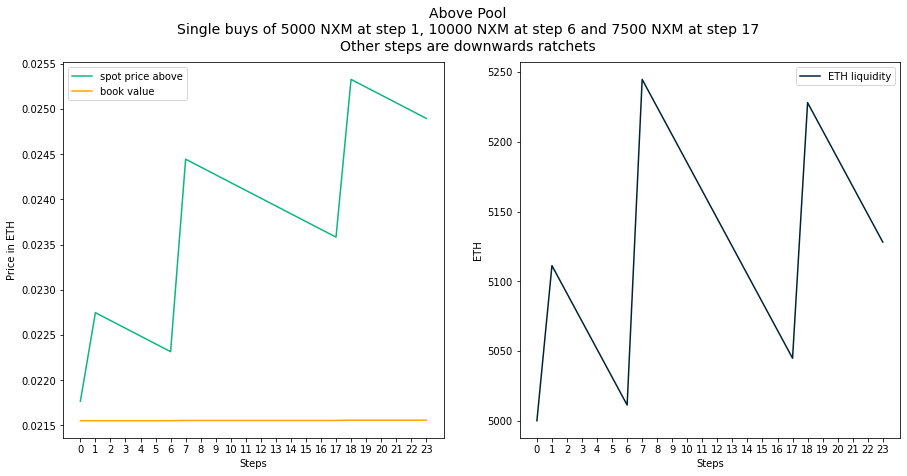

In [42]:
# Above graphs

fig, axs = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle(f'''Above Pool
Single buys of {nxm_buy_size_1} NXM at step 1, {nxm_buy_size_2} NXM at step 6 and {nxm_buy_size_3} NXM at step 17
Other steps are downwards ratchets
            ''',
             fontsize=14)
fig.subplots_adjust(top=0.87)

# Subplot
axs[0].plot(range(buy_sim.steps+1), buy_sim.spot_price_a_prediction, label='spot price above', color=nexus_green)
axs[0].plot(range(buy_sim.steps+1), buy_sim.book_value_prediction, label='book value', color='orange')
# plt.ylim(bottom=0.0125)
axs[0].legend()
axs[0].set_xlabel("Steps")
axs[0].set_xticks(ticks=range(buy_sim.steps+1))
axs[0].set_ylabel("Price in ETH");

# Subplot
axs[1].plot(range(buy_sim.steps+1), buy_sim.liq_prediction, label='ETH liquidity', color=nexus_blue)
axs[1].legend()
axs[1].set_xlabel("Steps")
axs[1].set_xticks(ticks=range(buy_sim.steps+1))
axs[1].set_ylabel("ETH");